In [1]:
from mesa.visualization import (
    Slider,
    SolaraViz,
    make_plot_component,
    make_space_component,
)

import numpy as np
from mesa.experimental import SolaraViz
from mesa.space import NetworkGrid

from scripts.agents.orders import Order
from scripts.agents.riders import Rider
from scripts.delivering import Dispatcher
from animation.utils import agent_portrayal, Graph

In [2]:
np.random.seed(19)
num_riders = 2
max_t = 30
num_orders = 2

orders = [
    Order(
        id=i,
        creation_at=0,#(i+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, i*2),
    )
    for i in range(num_orders)
]

riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }


In [3]:
model= Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_free,riders_going_to_vendor,riders_going_to_customer,orders_delivered,orders_waiting,delivery_time,queue_size,bag_size,orders_assigned,orders_picked_up
0,2,0,0,0,2,NaN,NaN,NaN,0,0
1,1,1,0,0,0,NaN,2.0,NaN,2,0
2,1,1,0,0,0,NaN,2.0,NaN,2,0
3,1,1,0,0,0,NaN,2.0,NaN,2,0
4,1,1,0,0,0,NaN,2.0,NaN,2,0
5,1,1,0,0,0,NaN,2.0,NaN,2,0
6,1,1,0,0,0,NaN,2.0,NaN,2,0
7,1,0,1,0,0,NaN,NaN,2.0,2,2
8,1,0,1,1,0,7.0,NaN,1.0,2,2
9,1,0,1,1,0,7.0,NaN,1.0,2,2


<Axes: >

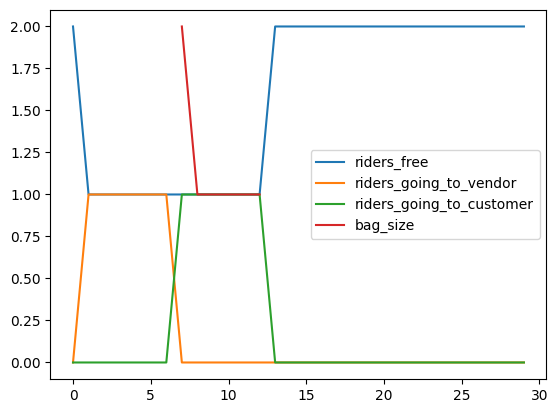

In [4]:
display(df)
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

,riders_free,riders_going_to_vendor,riders_going_to_customer,orders_delivered,orders_waiting,delivery_time,queue_size,bag_size,orders_assigned,orders_picked_up
0,10,0,0,0,50,NaN,NaN,NaN,0,0
1,10,0,0,0,50,NaN,NaN,NaN,0,0
2,7,3,0,0,45,NaN,1.666667,NaN,5,0


<Axes: >

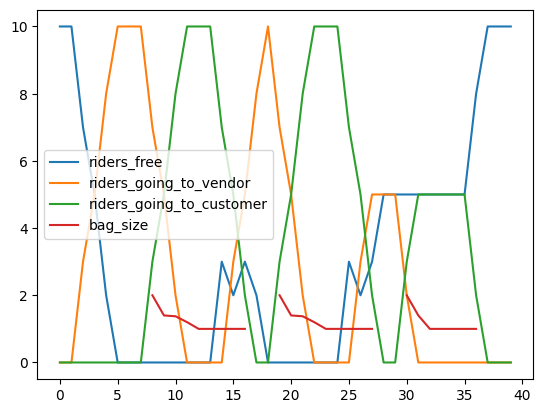

In [4]:
np.random.seed(19)
num_riders = 10
max_t = 40
num_orders = 50

orders = [
    Order(
        id=i,
        creation_at=(i//5+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
    )
    for i in range(num_orders)
]
riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
display(df[:3])
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

<Axes: >

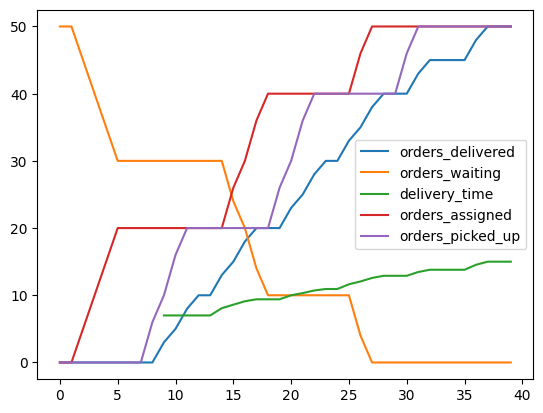

In [5]:
df[[c for c in df.columns if "orders" in c or "time" in c]].plot()

In [6]:
viz = SolaraViz(
    model_class=Dispatcher,
    #components=[Graph],
    model_params=model_params,
    name="Dispatcher",
    play_interval=10,
    agent_portrayal=agent_portrayal,
    measures=["delivery_time", "orders_assigned", "bag_size", "queue_size", "riders_free", "riders_going_to_vendor", "orders_picked_up", "orders_delivered"],
  
)

viz

Cannot show ipywidgets in text

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_free,riders_going_to_vendor,riders_going_to_customer,orders_delivered,orders_waiting,delivery_time,queue_size,bag_size,orders_assigned,orders_picked_up
0,81,0,0,0,420,NaN,NaN,NaN,0,0
1,81,0,0,0,420,NaN,NaN,NaN,0,0
2,81,0,0,0,420,NaN,NaN,NaN,0,0


<Axes: >

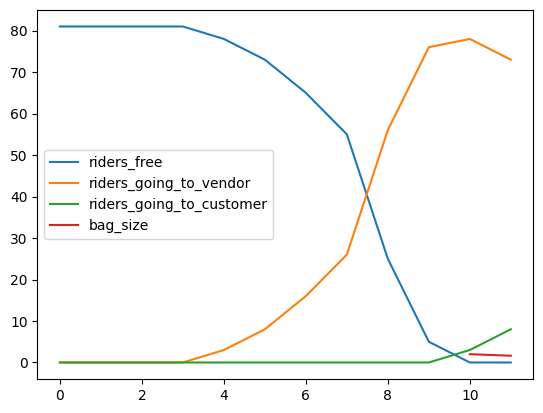

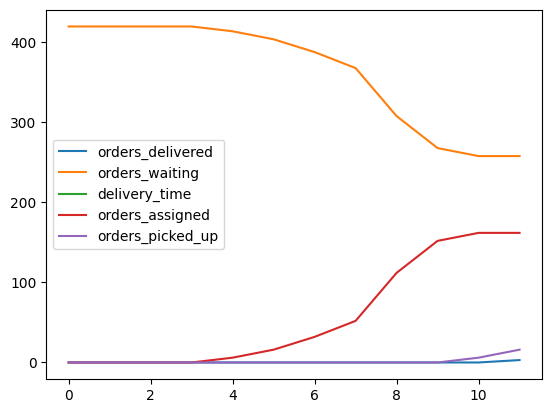

In [7]:
np.random.seed(19)

# TODO do a function to convert a list of quantities of orders into orders ->
# for each i, will create as many orders as are in the list[i]

_orders = [0, 0, 10, 20, 40, 100, 110, 90, 50, 0, 0, 0]
_riders = [0, 0, 0, 3, 5, 8, 10, 30, 20, 5, 0, 0]
max_t = len(_orders)



orders = [
    Order(
        id=sum(_orders[:t])+i,
        creation_at=t,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
    )
    for t, q in enumerate(_orders) 
    for i in range(q)
]
riders = [ 
    Rider(
        id=i, 
        shift_start_at=t, 
        shift_end_at=min(t+5, max_t),
        starting_point=(0,0)
    )
    for t, q in enumerate(_riders) 
    for i in range(q)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
display(df[:3])
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()
df[[c for c in df.columns if "orders" in c or "time" in c]].plot()

In [ ]:
#[o.id for o in orders] == list(range(sum(_orders)))


True